In [1]:
import xmltodict
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from datetime import timedelta

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')

d:\python3+\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cuongtran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
sia = SIA()

In [3]:
url = "http://apidintegra.tkfweb.com/apid/request?method=getNewsData&search=micron&date_from=01.08.2018&date_to=20.09.2018&num=500&id=407429488&ci=iD2&ui=SG21701-tgsgfrontam43&lang=4&tc=107,116"
html = requests.get(url)
qdata = xmltodict.parse(html.content)['XRF']['NL']

In [4]:
qdata

OrderedDict([('@ds', '20180801'),
             ('@ts', '000000'),
             ('@de', '20180920'),
             ('@te', '235959'),
             ('N',
              [OrderedDict([('@k', '214:20180920DN010216'),
                            ('@b', '23295'),
                            ('@ac', '63510'),
                            ('@d', '20180920'),
                            ('@t', '203600'),
                            ('@cc',
                             '744681;888938;951691;998313;998337;998350'),
                            ('@tc', '100;102;103;105;106;116'),
                            ('@l', '4'),
                            ('@f', '1'),
                            ('H',
                             'DJ Micron Technology Files 8K - Director, Officer or Compensation Filing >MU')]),
               OrderedDict([('@k', '214:20180920DN007009'),
                            ('@b', '23359'),
                            ('@ac', '63510'),
                            ('@d', '20180920'),
  

In [25]:
k = []
tc = []
d = []
h = []
sen = []
for data in qdata['N']:
    k.append(data['@k'])
    d.append(data['@d'])
    tc.append(data['@tc'])
    h.append(data['H'].replace("DJ",''))
    sen.append(sia.polarity_scores(data['H'].lower())['compound'])
datalist = np.array([d,h,sen]).T

df = pd.DataFrame(datalist)
df.columns = ['date','heading','impact']

In [5]:
def get_impactful_news(df):
    #Machine learning module to select impactful news
    indexes = np.random.choice(range(len(df)),8,replace=False)
    return df.iloc[indexes,:]

In [111]:
def show_impactful_news(df):
    sen = df.impact
    sort = np.argsort(sen)
    return pd.concat([df.iloc[sort[:4][::-1],:].reset_index(drop=True),\
                      df.iloc[sort[::-1][:4],:].reset_index(drop=True)],\
                      axis=1,keys=['Top Negative News','Top Positive News'])

In [112]:
def show_impactful_news_time(this_df,time_range=7):
    this_df.date = pd.to_datetime(this_df['date'])
    this_df = this_df.set_index('date')
    this_df = this_df.loc[:this_df.index[0] - timedelta(days=time_range),:]
    sen = this_df.impact
    sort = np.argsort(sen) 
    return pd.concat([this_df.iloc[sort[:4][::-1],:].reset_index(),\
                        this_df.iloc[sort[::-1][:4],:].reset_index()],\
                        axis=1,\
                        keys=['Top Negative News in %d days' % time_range,'Top Positive News in %d days' % time_range])

In [113]:
show_impactful_news(df)

Top Negative News                                                     \
               date                                            heading   
0        2018-09-10   Micron Price Target Lowered At Susquehanna On...   
1        2018-09-18   Micron Target Lowered At Cowen; Analyst Calls...   
2        2018-09-11   Micron Stock Falls After RBC Lowers Target --...   
3        2018-09-18   Micron's Stock Gains After J.P. Morgan Dispel...   

           Top Positive News  \
    impact              date   
0   -0.128        2018-09-07   
1   -0.128        2018-09-13   
2   -0.128        2018-08-30   
3  -0.1027        2018-08-02   

                                                              
                                             heading  impact  
0   Micron Stock Gains After Analysts Defend DRAM...  0.6808  
1   From: Ngui, Yantoultra - Takeover Offer of Ma...  0.5574  
2   Heard on the Street: Micron Has Good Reason T...  0.4404  
3   Facebook's Faceplant a Buying Opportunity -- ...  0.4215

In [107]:
show_impactful_news_time(df,time_range=14)

Top Negative News in 14 days  \
                          date   
0                   2018-09-11   
1                   2018-09-10   
2                   2018-09-18   
3                   2018-09-18   

                                                               \
                                             heading   impact   
0   Micron Stock Falls After RBC Lowers Target --...   -0.128   
1   Micron Price Target Lowered At Susquehanna On...   -0.128   
2   Micron Target Lowered At Cowen; Analyst Calls...   -0.128   
3   Micron's Stock Gains After J.P. Morgan Dispel...  -0.1027   

  Top Positive News in 14 days  \
                          date   
0                   2018-09-07   
1                   2018-09-13   
2                   2018-09-13   
3                   2018-09-20   

                                                              
                                             heading  impact  
0   Micron Stock Gains After Analysts Defend DRAM...  0.6808  
1   From: Ngui, Yantoultra - Takeover Offer of Ma...  0.5574  
2   USD/CAD Tests 1.3000 Support on Rallying Oil ...  0.4019  
3   Update: Micron Stock Gains Ahead Of Crucial E...    0.34

In [200]:
url_stock = "http://apidintegra.tkfweb.com/apid/request?method=getTimeSeries&ik=1222171,380,1&pk=1&mode=snap&period=1d&date_from=13.06.2018&date_to=23.09.2018&id=407429488&ci=iD2&ui=SG21701-tgsgfrontam43"
html = requests.get(url_stock)
qdata = xmltodict.parse(html.content)['XRF']['IL']['I']['TSL']


In [ ]:
timeseries = {}
for data in qdata:
    dict_tmp = {}
    for tdata in data['TS']:
        key = tdata['@t'] 
        if key not in dict_tmp:
            dict_tmp[key] = tdata['P']['@v']
    timeseries[data['@d']]=dict_tmp
timeseries.keys()

In [433]:
df = pd.read_csv("events.csv")

In [434]:
import plotly.plotly as py
import plotly.graph_objs as go

import networkx as nx

In [435]:
D = nx.DiGraph()
colors = {
    'A':'g',
    'B':'y',
    'C':'g',
    'D':'g',
    'E':'g',
    'F':'r',
    'G':'g',
    'H':'r',
    'I':'y',
    'J':'r',
    'K':'r',
    'L':'r',
    'M':'r',
    'Revenue':'w'
}
pos= {
    'A':(1,1),
    'B':(2,1),
    'C':(1.5,2),
    'D':(1.5,3),
    'E':(1.5,4),
    'F':(6,1),
    'G':(6,2),
    'H':(6,3),
    'I':(3,1),
    'J':(4,1),
    'K':(3.5,2),
    'L':(3.5,3),
    'M':(3.5,4),
    'Revenue':(3.5,6)
}

In [436]:
nodes = sorted(list(set(list(df['Event1']) + list(df['Event2']))))
for i in range(len(nodes)):
    D.add_node(nodes[i])

In [442]:
for i in range(len(df)):
    D.add_edge(df.iloc[i,0],df.iloc[i,1],wight=df.iloc[i,2])

In [443]:
%matplotlib inline

In [444]:
import matplotlib.pyplot as plt


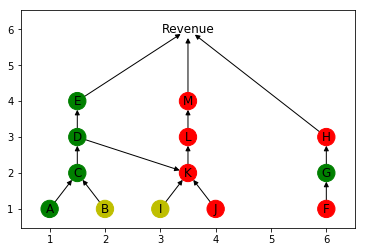

In [445]:
nx.draw_networkx(D,node_color=list(colors.values()),pos=pos)

In [201]:
url_story = "http://apidintegra.tkfweb.com/apid/request?method=getNewsStory&Story=214:20180920DN009766&id=407429488&ci=iD2&ui=SG21701-tgsgfrontam43"

In [48]:
html = requests.get(url_story)

soup = BeautifulSoup(html.content, "html.parser")

In [141]:
soup.find('h')

<h>DJ Micron Stock Rises After Results Tops Street Estimates -- MarketWatch</h>

In [117]:
soup.find('t').text.\
    replace("<P>",'').\
    replace("</P>",'.').\
    replace("\n","").\
    replace("&nbsp;","").\
    split("<PRE>")[0]


' Micron Technology Inc. (MU) shares rose in the extended session Thursday after the memory chip maker topped Wall Street estimates for the quarter. Micron shares advanced 2.7% after hours, following a 2.2% rise to close the regular session at $46.06. The company reported fiscal fourth-quarter net income of $4.33 billion, or $3.56 a share, compared with $2.37 billion, or $1.99 a share, in the year-ago period. Adjusted earnings were $3.53 a share. Revenue rose to $8.44 billion from $6.14 billion in the year-ago period. Analysts surveyed by FactSet had estimated $3.33 a share on revenue of $8.25 billion. &quot;In the fourth quarter, we set revenue records across all our major markets, from automotive and industrial to mobile and cloud datacenters,&quot; said Sanjay Mehrotra, Micron chief executive and president, in a statement. At the close, Micron shares were up 12% for the year, compared with a 9.6% rise in the S&amp;P 500 index and a 10.7% gain in the PHLX Semiconductor Index . -Walla